# Модель машиннго обучения - PolynomialFeatures()!!!

In [1]:
import pandas as pd # работа с данными / python data analysis library
import numpy as np # работа с числовыми данными / python numerical computing library
import seaborn as sns # визуализация данных / python data visualization library
import matplotlib.pyplot as plt # визуализация данных / python data visualization library
%matplotlib inline

from sklearn.linear_model import LinearRegression # алгоритм линейной регрессии / linear regression
from sklearn.preprocessing import PolynomialFeatures # алгоритм созданием полиномиальных признаков / 

from sklearn.metrics import mean_absolute_error # метрика средняя абсолютная ошибка / mean absolute error
from sklearn.metrics import mean_squared_error # метрика средняя квадратичная ошибка / mean squared error
from sklearn.metrics import mean_absolute_percentage_error # метрика средняя абсолютная процентная ошибка / mean absolute percentage error

from sklearn.model_selection import train_test_split # разделение выборки на обучающую и тестовую / train_test_split
from sklearn.feature_selection import SelectKBest, f_regression # алгоритм для выбора признаков с наивысшими оценками в модели машинного обучения на основе статистических тестов / f-regression одномерный тест линейной регрессии  
from sklearn.preprocessing import MinMaxScaler # алгоритм нормализации данных / MinMaxScaler

from joblib import dump, load

# отключаем предупреждения
import warnings 
warnings.filterwarnings("ignore")

In [2]:
%%time
# фиксируем RANDOM_SEED, для воспроизводимости кода
RANDOM_SEED = 369

# загружаем данные
data_poli = pd.read_csv("data/data_final.csv", sep=",")

# создаем матрицу наблюдений и вектор правильных ответов
X = data_poli.drop(columns="target", axis=1)
y = data_poli["target"]

# производим разделение выборки на тренировочную, валидационную и тестовую
X_train, X_validtest, y_train, y_validtest = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_validtest, y_validtest, test_size=0.5, random_state=RANDOM_SEED)

# производим отбор наиболее важных признаков
selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(X_train, y_train)
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
X_test = X_test[best_features]

# производим нормализацию данных с помощью MinMaxScaller
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_valid = min_max_scaler.transform(X_valid)
X_test = min_max_scaler.transform(X_test)

# генерируем полиномиальные признаки и обучаем повторно модель LinearRegression
model_PF = PolynomialFeatures(3, include_bias=False)
X_train_poly = model_PF.fit_transform(X_train)
X_valid_poly = model_PF.fit_transform(X_valid)
X_test_poly = model_PF.fit_transform(X_test)

# строим и обучаем модель
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_train_predict_poly = model_poly.predict(X_train_poly)
y_valid_predict_poly = model_poly.predict(X_valid_poly)
y_test_predict_poly = model_poly.predict(X_test_poly)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print('     RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict_poly))))
print('     MAE: {:.2f}'.format(mean_absolute_error(y_train, y_train_predict_poly)))
print('     MAPE: {:.2f}%'.format(mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print("Валидационная выборка:")
print('     RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_poly))))
print('     MAE: {:.2f}'.format(mean_absolute_error(y_valid, y_valid_predict_poly)))
print('     MAPE: {:.2f}%'.format(mean_absolute_percentage_error(y_valid, y_valid_predict_poly)*100))
print("Тестовая выборка:")
print('     RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_test_predict_poly))))
print('     MAE: {:.2f}'.format(mean_absolute_error(y_test, y_test_predict_poly)))
print('     MAPE: {:.2f}%'.format(mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))
# print(f"Коэффициент пересечения модели:, {model_poly.intercept_}")
# print(f"Коэффициенты модели: {model_poly.coef_}")


Тренировочная выборка:
     RMSE: 84713.57
     MAE: 46823.03
     MAPE: 13.69%
Валидационная выборка:
     RMSE: 86415.53
     MAE: 47421.89
     MAPE: 13.69%
Тестовая выборка:
     RMSE: 84972.00
     MAE: 47107.13
     MAPE: 13.62%
CPU times: user 33.1 s, sys: 4.7 s, total: 37.7 s
Wall time: 24 s


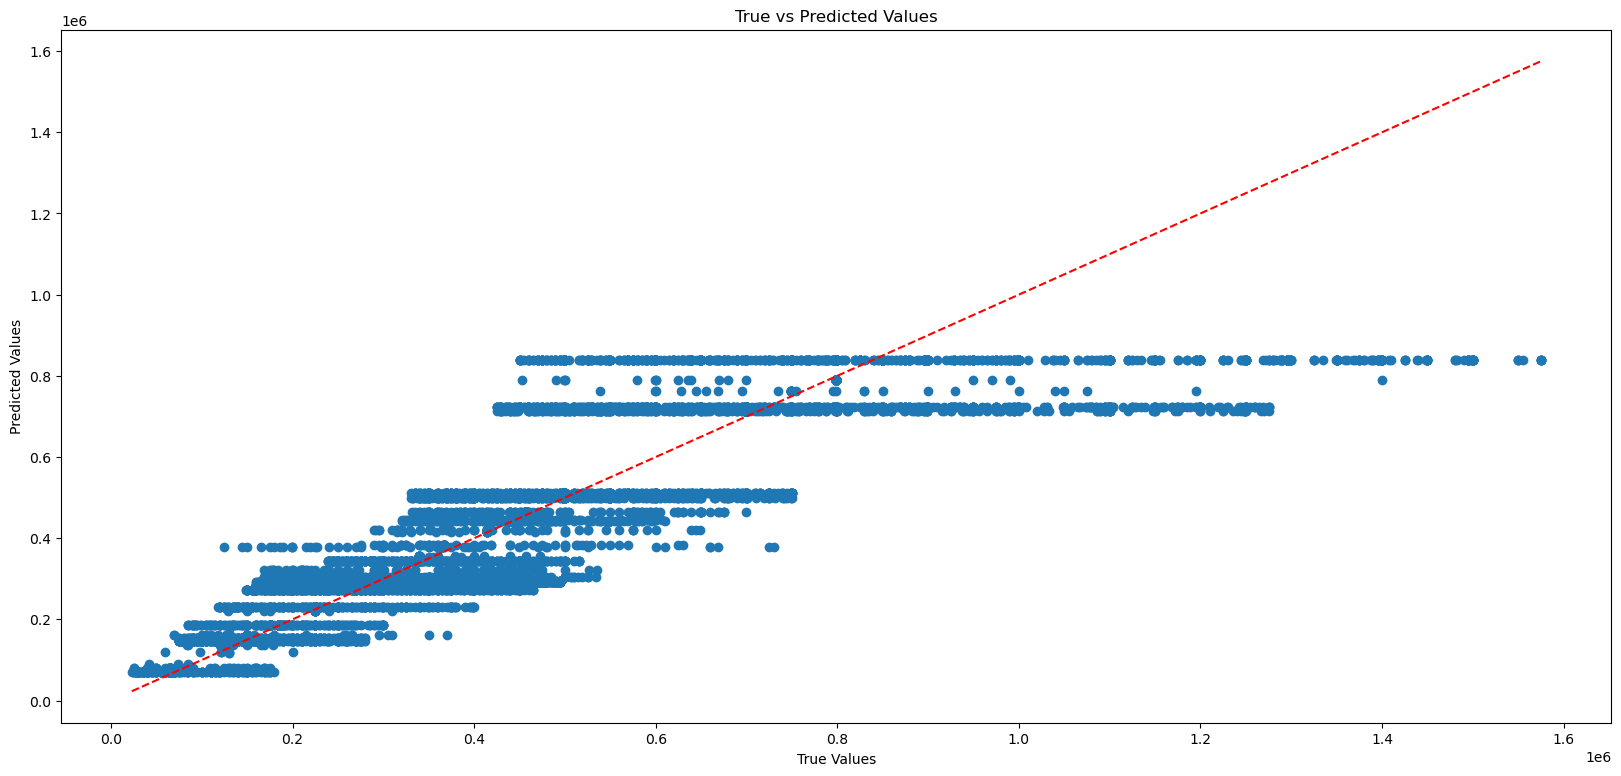

In [3]:
# график предсказанных значений против истинных значений на тестовой выборке
y_pred = y_test_predict_poly
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

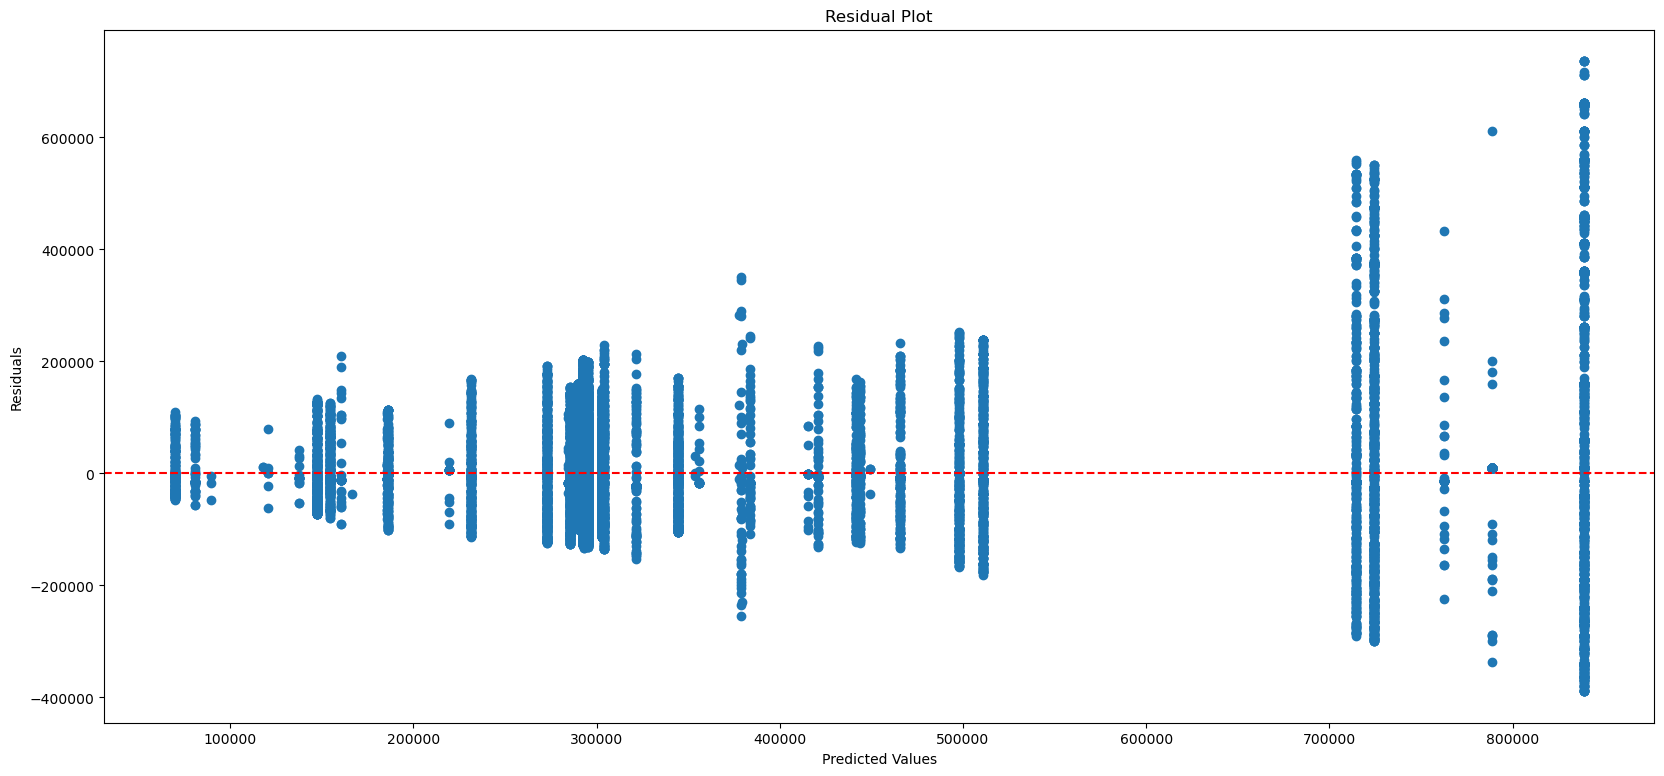

In [4]:
# график остатков на тестовой выборке
residuals = y_test - y_pred
plt.figure(figsize=(20, 9))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [5]:
# cохраняем модель в файл
dump(model_poly, "model/model_PolynomialFeatures.joblib")

['model/model_PolynomialFeatures.joblib']